                                      USED BIKE PRICES-FEATURE ENGINEERING AND EDA

Reading Data and Basic Stats

In [141]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from ydata_profiling import ProfileReport
import ydata_profiling
import statsmodels.api as sm

In [142]:
# importing data
data = pd.read_csv("bikes.csv")

In [143]:
# Display the first few rows of the dataset
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


Data Cleaning and Feature Engineering

In [144]:
# checking missing values
data.isna().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [145]:
import re

cc = []

for veh in data['model_name']:
    # Lowercase and remove the last token (likely year info)
    model = " ".join(veh.split(" ")[:-1]).lower()

    # Try matching patterns like "150cc" or "500 cc"
    match = re.search(r'\b\d+\s*cc\b', model, flags=re.I)

    if match:
        cc_value = match.group().strip()
        if cc_value != 'cc':
            cc.append(cc_value)
        else:
            cc.append(model)
    elif "hyosung" in model:
        cc.append(model)
    else:
        cc.append(model)


In [146]:
# adding data to missing columns
for i in range(len(cc)):
    if "1000" in cc[i]:
        cc[i] = "1000cc"
    elif "310" in cc[i]:
        cc[i] = "310cc"
    elif "apache rtr 200" in cc[i]:
        cc[i] = "200cc"
    elif "ns200" in cc[i]:
        cc[i] = "200cc"
    elif "rs200" in cc[i]:
        cc[i] = "200cc"
    elif "220" in cc[i]:
        cc[i] = "220cc"
    elif "400" in cc[i]:
        cc[i] = "400cc"
    elif "250" in cc[i]:
        cc[i] = "250cc"
    elif "125" in cc[i]:
        cc[i] = "125cc"
    elif "160" in cc[i]:
        cc[i] = "160cc"
    elif "150" in cc[i]:
        cc[i] = "150cc"
    elif "350" in cc[i]:
        cc[i] = "350cc"
    elif "200" in cc[i]:
        cc[i] = "200cc"
    elif "100" in cc[i]:
        cc[i] = "100cc"
    elif "180" in cc[i]:
        cc[i] = "180cc"
    elif "110" in cc[i]:
        cc[i] = "110cc"
    elif "390" in cc[i]:
        cc[i] = "390cc"
    elif "135" in cc[i]:
        cc[i] = "135cc"
    elif "r15" in cc[i]:
        cc[i] = "150cc"
    elif "650" in cc[i]:
        cc[i] = "650cc"
    elif "750" in cc[i]:
        cc[i] = "750cc"
    elif "800" in cc[i]:
        cc[i] = "800cc"
    elif "300" in cc[i]:
        cc[i] = "300cc"
    elif "765" in cc[i]:
        cc[i] = "765cc"
    elif "883" in cc[i]:
        cc[i] = "883cc"
    elif "797" in cc[i]:
        cc[i] = "797cc"
    elif "810" in cc[i]:
        cc[i] = "810cc"
    elif "321" in cc[i]:
        cc[i] = "321cc"
    elif "821" in cc[i]:
        cc[i] = "821cc"
    elif "120" in cc[i]:
        cc[i] = "120cc"
    elif "1745" in cc[i]:
        cc[i] = "1745cc"
    elif "899" in cc[i]:
        cc[i] = "899cc"
    elif "900" in cc[i]:
        cc[i] = "900cc"
    elif "302" in cc[i]:
        cc[i] = "302cc"
    elif "959" in cc[i]:
        cc[i] = "959cc"
    elif "600" in cc[i]:
        cc[i] = "600cc"
    elif "502" in cc[i]:
        cc[i] = "502cc"
    elif "um renegade" in cc[i]:
        cc[i] = "279cc"
    elif "hero splendor" in cc[i]:
        cc[i] = "97cc"
    elif "hero passion plus" in cc[i]:
        cc[i] = "97cc"
    elif "yamaha fz" in cc[i]:
        cc[i] = "150cc"
    elif "honda hornet" in cc[i]:
        cc[i] = "184cc"
    elif "royal enfield interceptor" in cc[i]:
        cc[i] = "650cc"
    elif "hero passion pro" in cc[i]:
        cc[i] = "113cc"
    elif "hero passion xpro" in cc[i]:
        cc[i] = "109cc"
    elif "harley-davidson street bob" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson fat bob" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson fat boy" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson street rod" in cc[i]:
        cc[i] = "749cc"
    elif "zx-10r" in cc[i]:
        cc[i] = "1000cc"
    elif "rsv4" in cc[i]:
        cc[i] = "1099cc"
    elif "tvs sport" in cc[i]:
        cc[i] = "109cc"
    elif "tvs star city" in cc[i]:
        cc[i] = "109cc"
    elif "harley-davidson superlow" in cc[i]:
        cc[i] = "883cc"
    elif "harley-davidson roadster" in cc[i]:
        cc[i] = "1202cc"
    elif "harley-davidson forty eight" in cc[i]:
        cc[i] = "1202cc"
    elif "harley-davidson night rod special" in cc[i]:
        cc[i] = "1247cc"
    elif "triumph rocket iii roadster" in cc[i]:
        cc[i] = "2458cc"
    elif "triumph thunderbird lt" in cc[i]:
        cc[i] = "1699cc"
    elif "kawasaki vulcan s black" in cc[i]:
        cc[i] = "649cc"
    elif "mahindra mojo black pearl" in cc[i]:
        cc[i] = "300cc"
    elif "ducati diavel carbon" in cc[i]:
        cc[i] = "1198cc"
    elif "triumph tiger explorer" in cc[i]:
        cc[i] = "1215cc"
    elif "royal enfield continental" in cc[i]:
        cc[i] = "650cc"
    elif "triumph street triple s" in cc[i]:
        cc[i] = "765cc"
    elif "harley-davidson breakout" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson cvo" in cc[i]:
        cc[i] = "1923cc"

In [147]:
if 'hero passion pro' in cc:
    cc[cc.index('hero karizma 223cc')] = '223cc'
else:
    print("'hero karizma 223cc' not found in cc list")


'hero karizma 223cc' not found in cc list


In [148]:
data['cc'] = cc 
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220cc
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350cc
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250cc
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400cc
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330cc
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,150cc
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,100cc
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,180cc
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,150cc


In [149]:
np.unique([i.split()[0] for i in data.model_name])

array(['Aprilia', 'BMW', 'Bajaj', 'Benelli', 'BenelliImperiale', 'Ducati',
       'Fb', 'Harley-Davidson', 'Hero', 'Honda', 'Husqvarna', 'Hyosung',
       'Ideal', 'Indian', 'Jawa', 'KTM', 'Kawasaki', 'MV', 'Mahindra',
       'Moto', 'Royal', 'Suzuki', 'TVS', 'Triumph', 'UM', 'Yamaha',
       'Yazdi', 'yamaha'], dtype='<U16')

In [150]:
data[data.model_name.str.contains("BenelliImperiale") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
2809,BenelliImperiale 400 BS6 2020,2020,2800 Km,first owner,mumbai,\n\n 35 kmpl,20.7 bhp,207500,400cc
2978,BenelliImperiale 400 2020,2020,1500 Km,first owner,mumbai,\n\n,20.7 bhp,207500,400cc
2979,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,206462,400cc
4177,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,220000,400cc
4399,BenelliImperiale 400 2020,2020,7700 Km,first owner,bangalore,\n\n,20.7 bhp,220000,400cc
5177,BenelliImperiale 400 2020,2020,1900 Km,first owner,secunderabad,\n\n,20.7 bhp,240000,400cc


In [151]:
data.model_name.replace('BenelliImperiale 400 2020','Benelli Imperiale 400 2020',inplace=True)
data.model_name.replace('BenelliImperiale 400 BS6 2020','Benelli Imperiale 400 BS6 2020',inplace=True)

In [152]:
data[data.model_name.str.contains("Benelli") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
1651,Benelli 302R 300CC 2017,2017,11000 Km,first owner,bangalore,\n\n,38.26 bhp,230000,300cc
1668,Benelli 302R 300CC 2018,2018,23933 Km,first owner,bangalore,\n\n,38.26 bhp,270000,300cc
1926,Benelli 302R 300CC 2018,2018,15025 Km,second owner,mumbai,\n\n,38.26 bhp,240000,300cc
1939,Benelli Leoncino 500cc 2019,2019,3300 Km,first owner,delhi,\n\n,46.8 bhp,435262,500cc
2140,Benelli TNT 300 ABS 2020,2020,4500 Km,first owner,delhi,\n\n 25 kmpl,37.73 bhp,295000,300cc
2307,Benelli TNT 300 2017,2017,10000 Km,first owner,mumbai,\n\n 25 kmpl,37.73 bhp,259375,300cc
2420,Benelli TNT 300 ABS 2020,2020,13000 Km,first owner,belgaum,\n\n 25 kmpl,37.73 bhp,315000,300cc
2435,Benelli TNT 899 2015,2015,3174 Km,first owner,jajpur,\n\n 17 kmpl,119.37 bhp,569400,899cc
2554,Benelli 302R 300CC 2019,2019,12000 Km,first owner,ranchi,\n\n,38.26 bhp,269000,300cc
2652,Benelli TNT 600 GT 2016,2016,11000 Km,first owner,chandigarh,\n\n 19 kmpl,82.70 bhp,497000,600cc


In [153]:
brands = [i.split()[0] for i in data.model_name]
data['brand'] = brands

In [154]:
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220cc,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350cc,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250cc,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400cc,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330cc,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,150cc,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,100cc,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,180cc,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,150cc,Bajaj


In [155]:
# replacing data
data.replace('Ideal',"Jawa",inplace=True)
data.replace("yamaha","Yamaha",inplace=True)

In [156]:
mil = data.mileage.to_list()
mil = [str(i).lower().replace('kmpl','').split("-")[0] for i in mil ]
mil = [str(i).lower().replace('kms','') for i in mil ]
mil = [str(i).replace('\n','') for i in mil ]
mil = [str(i).strip() for i in mil]
data.mileage = mil

In [157]:
data[data.mileage == 'liquid cooled']

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
157,Jawa Forty Two 295CC 2019,2019,4930 Km,first owner,moradabad,liquid cooled,27 bhp,140000,295cc,Jawa
211,Jawa Forty Two 295CC Dual ABS BS6 2020,2020,5000 Km,first owner,pune,liquid cooled,27 bhp,190000,295cc,Jawa
300,Jawa Forty Two 295CC 2019,2019,600 Km,first owner,ludhiana,liquid cooled,27 bhp,162000,295cc,Jawa
347,Jawa Forty Two 295CC 2019,2019,3200 Km,first owner,ghaziabad,liquid cooled,27 bhp,160000,295cc,Jawa
549,Jawa Forty Two Dual ABS 295CC 2020,2020,419 Km,first owner,chennai,liquid cooled,27 bhp,165000,295cc,Jawa
656,Jawa Forty Two 295CC 2019,2019,1800 Km,first owner,nagpur,liquid cooled,27 bhp,142000,295cc,Jawa
668,Jawa Standard 295CC ABS BS6 2020,2020,3000 Km,first owner,rajkot,liquid cooled,27 bhp,167000,295cc,Jawa
699,Jawa Standard 295CC Dual ABS BS6 2020,2020,2700 Km,first owner,mumbai,liquid cooled,27 bhp,160000,295cc,Jawa
775,Jawa Forty Two Dual ABS 295CC 2020,2020,1700 Km,first owner,allahabad,liquid cooled,27 bhp,220000,295cc,Jawa
815,Jawa Forty Two 295CC 2019,2019,11500 Km,first owner,madurai,liquid cooled,27 bhp,170000,295cc,Jawa


In [158]:
data.replace('liquid cooled','37.6',inplace=True)

In [159]:
np.unique(data.mileage)

array(['', '104', '12', '12.5', '13', '14', '15', '16', '17', '17.85',
       '18', '18.86', '19', '20', '20.3', '20.40', '21', '22', '23', '25',
       '26', '27', '28', '29', '30', '31.85', '32', '35', '37', '37.6',
       '38', '38.5', '39.1', '39.4', '40', '42', '43', '45', '45.8',
       '46.40', '48', '5', '50', '52', '53', '53.72', '54', '55', '55.47',
       '56', '57', '58', '59', '60', '62', '63', '63.97', '64', '65',
       '67', '68', '69', '70', '71', '72', '74', '75', '77', '80', '81',
       '82', '82.4', '83', '84', '85', '89', '90', '95', '96.9', 'nan'],
      dtype=object)

In [160]:
data[data.mileage == 'nan']

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
144,TVS Apache RTR 160cc 2014,2014,20372 Km,first owner,delhi,nan,15.2 bhp @ 8500 rpm,42000,160cc,TVS
193,Hero Karizma R 223cc 2010,2010,70000 Km,first owner,noida,nan,"17 bhp @ 7,000 rpm",19215,223cc,Hero
422,TVS Apache 150cc 2007,2007,36486 Km,second owner,bathinda,nan,13.7 Bhp @ 8500 rpm,19500,150cc,TVS
1376,KTM RC 390cc 2015,2015,28000 Km,second owner,hyderabad,nan,"43 bhp @ 9,000 rpm",130000,390cc,KTM
1488,Royal Enfield Thunderbird 350cc 2015,2015,24000 Km,first owner,bangalore,nan,"19.80 bhp @ 5,250 rpm",115000,350cc,Royal
1640,Kawasaki Ninja 650cc 2020,2020,8000 Km,second owner,delhi,nan,"66.4 bhp @ 8,000 rpm",520000,650cc,Kawasaki
2160,Harley-Davidson Street Rod 2019,2019,600 Km,first owner,bangalore,nan,70 bhp,700700,749cc,Harley-Davidson
2277,KTM Duke 200cc 2012,2012,30000 Km,first owner,bangalore,nan,"25 bhp @ 10,000 rpm",85000,200cc,KTM
4646,Hero Passion Pro 100cc 2014,2014,16834 Km,first owner,chandigarh,nan,8.2 Bhp @ 8000 rpm,40000,100cc,Hero
4655,Bajaj Pulsar 180cc 2013,2013,82000 Km,first owner,chandigarh,nan,"15 bhp @ 9,000 rpm",40000,180cc,Bajaj


In [230]:
# adding data in missing columns
data.iloc[144,data.columns.get_loc('mileage')] = "54"
data.iloc[193,data.columns.get_loc('mileage')] = "45"
data.iloc[422,data.columns.get_loc('mileage')] = "62"
data.iloc[1376,data.columns.get_loc('mileage')] = "25"
data.iloc[1488,data.columns.get_loc('mileage')] = "40"
data.iloc[1640,data.columns.get_loc('mileage')] = "25"
data.iloc[2160,data.columns.get_loc('mileage')] = "18"
data.iloc[2277,data.columns.get_loc('mileage')] = "35"
data.iloc[4646,data.columns.get_loc('mileage')] = "65"
data.iloc[4655,data.columns.get_loc('mileage')] = "45"
data.iloc[7394,data.columns.get_loc('mileage')] = "40"

In [162]:
data.replace('','0',inplace=True)

In [163]:
null_brands = np.unique(data[data.mileage == '0'].brand)
for brand in null_brands:
    values = data[data.brand == brand].mileage.to_numpy()
    values = np.delete(values,np.where(values == '0'))

if(len(values) == 0):
    print(brand) 
    mean=0
else:
    mean = values.astype("float32").mean()

for index,rows in data[data.brand == brand].iterrows():
    if data.iloc[index,data.columns.get_loc("mileage")] =='0':
        data.iloc[index,data.columns.get_loc("mileage")] = mean

Yazdi


In [164]:
# Find all brands with mileage = '0'
null_brands = np.unique(data[data['mileage'] == '0']['brand'])

for brand in null_brands:
    # Get all mileage values for the brand, excluding '0'
    values = data[(data['brand'] == brand) & (data['mileage'] != '0')]['mileage'].to_numpy()

    # If no valid mileage values are found, skip with mean = 0
    if len(values) == 0:
        print(f"⚠️ No valid mileage values for brand: {brand}")
        mean = 0
    else:
        mean = values.astype("float32").mean()

    # Update the '0' mileage entries with the calculated mean
    indices_to_update = data[(data['brand'] == brand) & (data['mileage'] == '0')].index
    data.loc[indices_to_update, 'mileage'] = mean

⚠️ No valid mileage values for brand: BMW
⚠️ No valid mileage values for brand: Fb


In [133]:
# adding data in missing columns
data.iloc[2023,data.columns.get_loc("mileage")] = "30"
data.iloc[2832,data.columns.get_loc("mileage")] = "30"
data.iloc[3400,data.columns.get_loc("mileage")] = "30"
data.iloc[3827,data.columns.get_loc("mileage")] = "30"

data.iloc[4154,data.columns.get_loc("mileage")] = "30"
data.iloc[4392,data.columns.get_loc("mileage")] = "30"
data.iloc[5435,data.columns.get_loc("mileage")] = "30"
data.iloc[5586,data.columns.get_loc("mileage")] = "17"
data.iloc[5727,data.columns.get_loc("mileage")] = "30"
data.iloc[6561,data.columns.get_loc("mileage")] = "30"

In [134]:
# adding data in missing columns
data.iloc[3773,data.columns.get_loc("mileage")] = "26"
data.iloc[5031,data.columns.get_loc("mileage")] = "26"

In [79]:
data.iloc[5584,data.columns.get_loc("mileage")] = "35"

In [80]:
for index,rows in data[data.location.isna()].iterrows():
    data.iloc[index,data.columns.get_loc("location")] = data[data.brand == rows.brand].dropna().location.mode()

In [81]:
val= data.power.isna()
np.where(val == True)

(array([ 222,  340,  385,  576,  626,  676,  723,  735,  877, 1019, 1152,
        1192, 1239, 1407, 1535, 1539, 1551, 1659, 1952, 2200, 2355, 2406,
        2568, 3077, 3098, 3114, 3126, 3130, 3195, 3201, 3224, 3370, 3414,
        3421, 3653, 3765, 3880, 3893, 3984, 4161, 4172, 4273, 4358, 4477,
        4569, 4601, 4602, 4785, 4829, 4955, 5224, 5490, 5635, 5676, 6161,
        6200, 6250, 6366, 6369, 6370, 6458, 6478, 6651, 6670, 6798, 6806,
        6816, 6952, 7033, 7061, 7077, 7125, 7318, 7384, 7425, 7445, 7601,
        7608, 7641, 7645, 7649, 7765, 7844], dtype=int64),)

In [82]:
# adding data in missing columns
data.iloc[135,data.columns.get_loc("power")] = "28"
data.iloc[1627,data.columns.get_loc("power")] = "14"
data.iloc[1691,data.columns.get_loc("power")] = "18"
data.iloc[1716,data.columns.get_loc("power")] = "18"
data.iloc[2442,data.columns.get_loc("power")] = "87"
data.iloc[2487,data.columns.get_loc("power")] = "18"
data.iloc[2638,data.columns.get_loc("power")] = "16"

data.iloc[2659,data.columns.get_loc("power")] = "64"
data.iloc[2714,data.columns.get_loc("power")] = "18"
data.iloc[2819,data.columns.get_loc("power")] = "87"
data.iloc[3088,data.columns.get_loc("power")] = "18"
data.iloc[3977,data.columns.get_loc("power")] = "37.5"
data.iloc[4393,data.columns.get_loc("power")] = "18"
data.iloc[4425,data.columns.get_loc("power")] = "111"
data.iloc[4591,data.columns.get_loc("power")] = "75.1"
data.iloc[4760,data.columns.get_loc("power")] = "18"
data.iloc[5626,data.columns.get_loc("power")] = "65"
data.iloc[5673,data.columns.get_loc("power")] = "89.2"
data.iloc[5694,data.columns.get_loc("power")] = "64"
data.iloc[5788,data.columns.get_loc("power")] = "11"
data.iloc[5950,data.columns.get_loc("power")] = "26.21"
data.iloc[6155,data.columns.get_loc("power")] = "15.2"
data.iloc[6321,data.columns.get_loc("power")] = "26.21"
data.iloc[6781,data.columns.get_loc("power")] = "28.15"
data.iloc[6853,data.columns.get_loc("power")] = "15.2"
data.iloc[7306,data.columns.get_loc("power")] = "10.70"
data.iloc[7442,data.columns.get_loc("power")] = "7.4"
data.iloc[7513,data.columns.get_loc("power")] = "23.17"
data.iloc[7783,data.columns.get_loc("power")] = "24.13"
data.iloc[7796,data.columns.get_loc("power")] = "7.4"
data.iloc[7801,data.columns.get_loc("power")] = "8.24"

In [250]:
for index, row in data.iterrows():
    power_val = str(row['power']).lower()

    # Handle values like '20 bhp'
    if 'bhp' in power_val:
        power_val = power_val.replace('bhp', '').strip()

    # Convert 'hp' to bhp (approx: 1 hp = 0.986 bhp)
    elif 'hp' in power_val:
        try:
            power_val = float(power_val.replace('hp', '').split('-')[0].strip()) * 0.986
        except:
            power_val = np.nan

    # Convert 'kw' to bhp (approx: 1 kw = 1.341 bhp)
    elif 'kw' in power_val:
        try:
            power_val = float(power_val.replace('kw', '').strip()) * 1.341
        except:
            power_val = np.nan

    # Convert 'ps' to bhp (approx: 1 ps = 0.99 bhp)
    elif 'ps' in power_val:
        try:
            power_val = float(power_val.replace('ps', '').strip()) * 0.99
        except:
            power_val = np.nan

    # Remove RPM data (e.g., '20 bhp @ 8000 rpm' → '20')
    if '@' in str(power_val):
        power_val = power_val.split('@')[0].strip()

    try:
        data.at[index, 'power'] = float(power_val)
    except:
        data.at[index, 'power'] = np.nan

In [251]:
data.isna().sum()

model_name       0
model_year       0
kms_driven    7857
owner            0
location         0
mileage          0
power          116
price            0
cc               0
brand            0
dtype: int64

In [252]:
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,NaN,first owner,hyderabad,35.0,19.0,63500,220cc,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,NaN,first owner,hyderabad,35.0,19.8,115000,350cc,Royal
2,Hyosung GT250R 2012,2012,NaN,first owner,hyderabad,30.0,28.0,300000,250cc,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,NaN,first owner,pondicherry,28.0,34.5,100000,400cc,Bajaj
4,Jawa Perak 330cc 2020,2020,NaN,first owner,bangalore,37.59999465942383,30.0,197500,330cc,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,NaN,first owner,agra,42.0,16.0,55000,150cc,Yamaha
7853,Bajaj Discover 100cc 2015,2015,NaN,first owner,delhi,80.0,7.7,28000,100cc,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,NaN,first owner,bangalore,65.0,17.0,61740,180cc,Bajaj
7855,Bajaj V15 150cc 2016,2016,NaN,first owner,bangalore,57.0,11.8,49000,150cc,Bajaj


In [259]:
# Clean the 'kms_driven' column
data['kms_driven'] = data['kms_driven'].astype(str)

# Replace text-based invalid entries with NaN
data['kms_driven'] = data['kms_driven'].apply(
    lambda x: np.nan if x.lower().strip() in ['mileage', 'yes'] else x
)

# Extract numeric part from strings like "17,000 Km"
data['kms_driven'] = data['kms_driven'].str.replace(r'[^\d]', '', regex=True)

# Convert to float
data['kms_driven'] = pd.to_numeric(data['kms_driven'], errors='coerce')

# Fill NaN with mean
data['kms_driven'] = data['kms_driven'].fillna(data['kms_driven'].mean())

In [260]:
data.isna().sum()

model_name       0
model_year       0
kms_driven    7857
owner            0
location         0
mileage          0
power          116
price            0
cc               0
brand            0
dtype: int64

In [261]:
data = data.astype({
    "model_name": str,
    "model_year": int,
    "kms_driven": int,
    "owner": str,
    "location": str,
    "mileage": float,
    "power": float,
    "price": int,
    "cc": int,
    "brand": str
}, errors='ignore')

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int32  
 2   kms_driven  0 non-null      float64
 3   owner       7857 non-null   object 
 4   location    7857 non-null   object 
 5   mileage     7857 non-null   float64
 6   power       7741 non-null   float64
 7   price       7857 non-null   int32  
 8   cc          7857 non-null   object 
 9   brand       7857 non-null   object 
dtypes: float64(3), int32(2), object(5)
memory usage: 552.6+ KB


In [263]:
pd.set_option("display.float",str)
data.describe().drop(["model_year"],axis=1)

,kms_driven,mileage,power,price
count,0.0,7857.0,7741.0,7857.0
mean,NaN,44.63015836308108,20.916787686345437,106791.33689703449
std,NaN,16.502301693491244,14.98890790347173,138926.1246277594
min,NaN,0.0,7.0,0.0
25%,NaN,35.0,14.0,42000.0
50%,NaN,40.0,19.0,75000.0
75%,NaN,55.0,24.16,125000.0
max,NaN,104.0,197.3,3000000.0


Data Visualisation

Text(0, 0.5, 'Count')

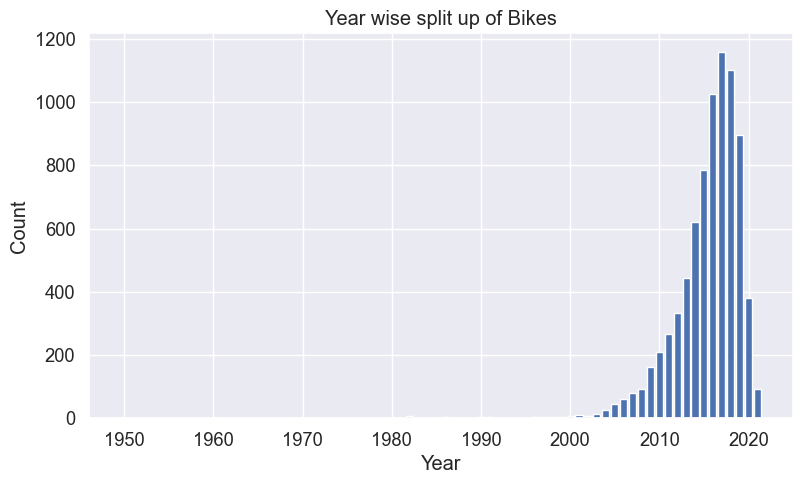

In [264]:
# ploting bar graph for Year wise split up of Bikes
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x,count = np.unique(data.model_year,return_counts=True)
plt.bar(x,count)
plt.title("Year wise split up of Bikes")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

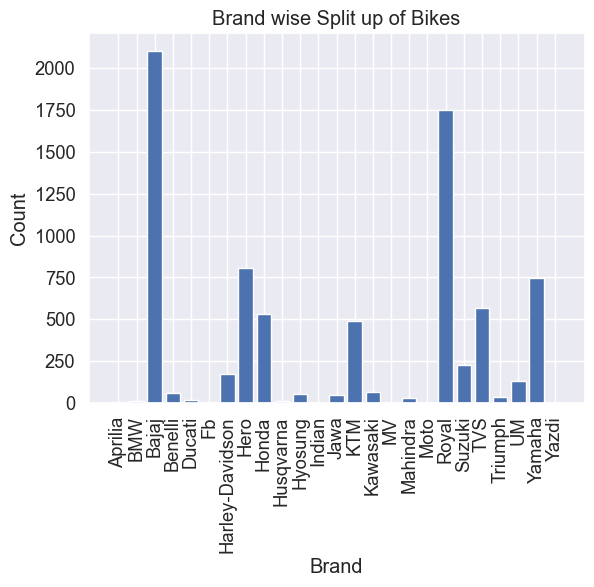

In [265]:
# ploting subplots for Brand wise Split up of Bikes
plt.subplot(1,1,1)
x,count = np.unique(data.brand,return_counts=True)
plt.bar(x,count)
plt.title("Brand wise Split up of Bikes")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Count")

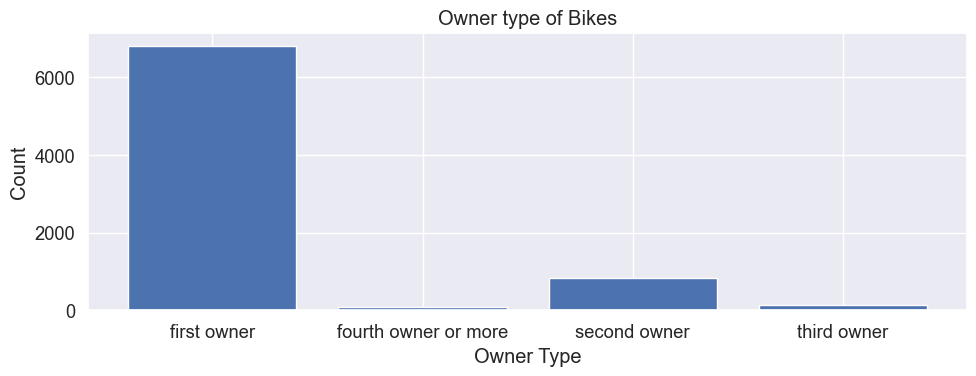

In [266]:
# ploting bar graph for Owner type of Bikes
plt.figure(figsize=(10,4))
x,count = np.unique(data.owner,return_counts=True)
plt.bar(x,count)
plt.title("Owner type of Bikes")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

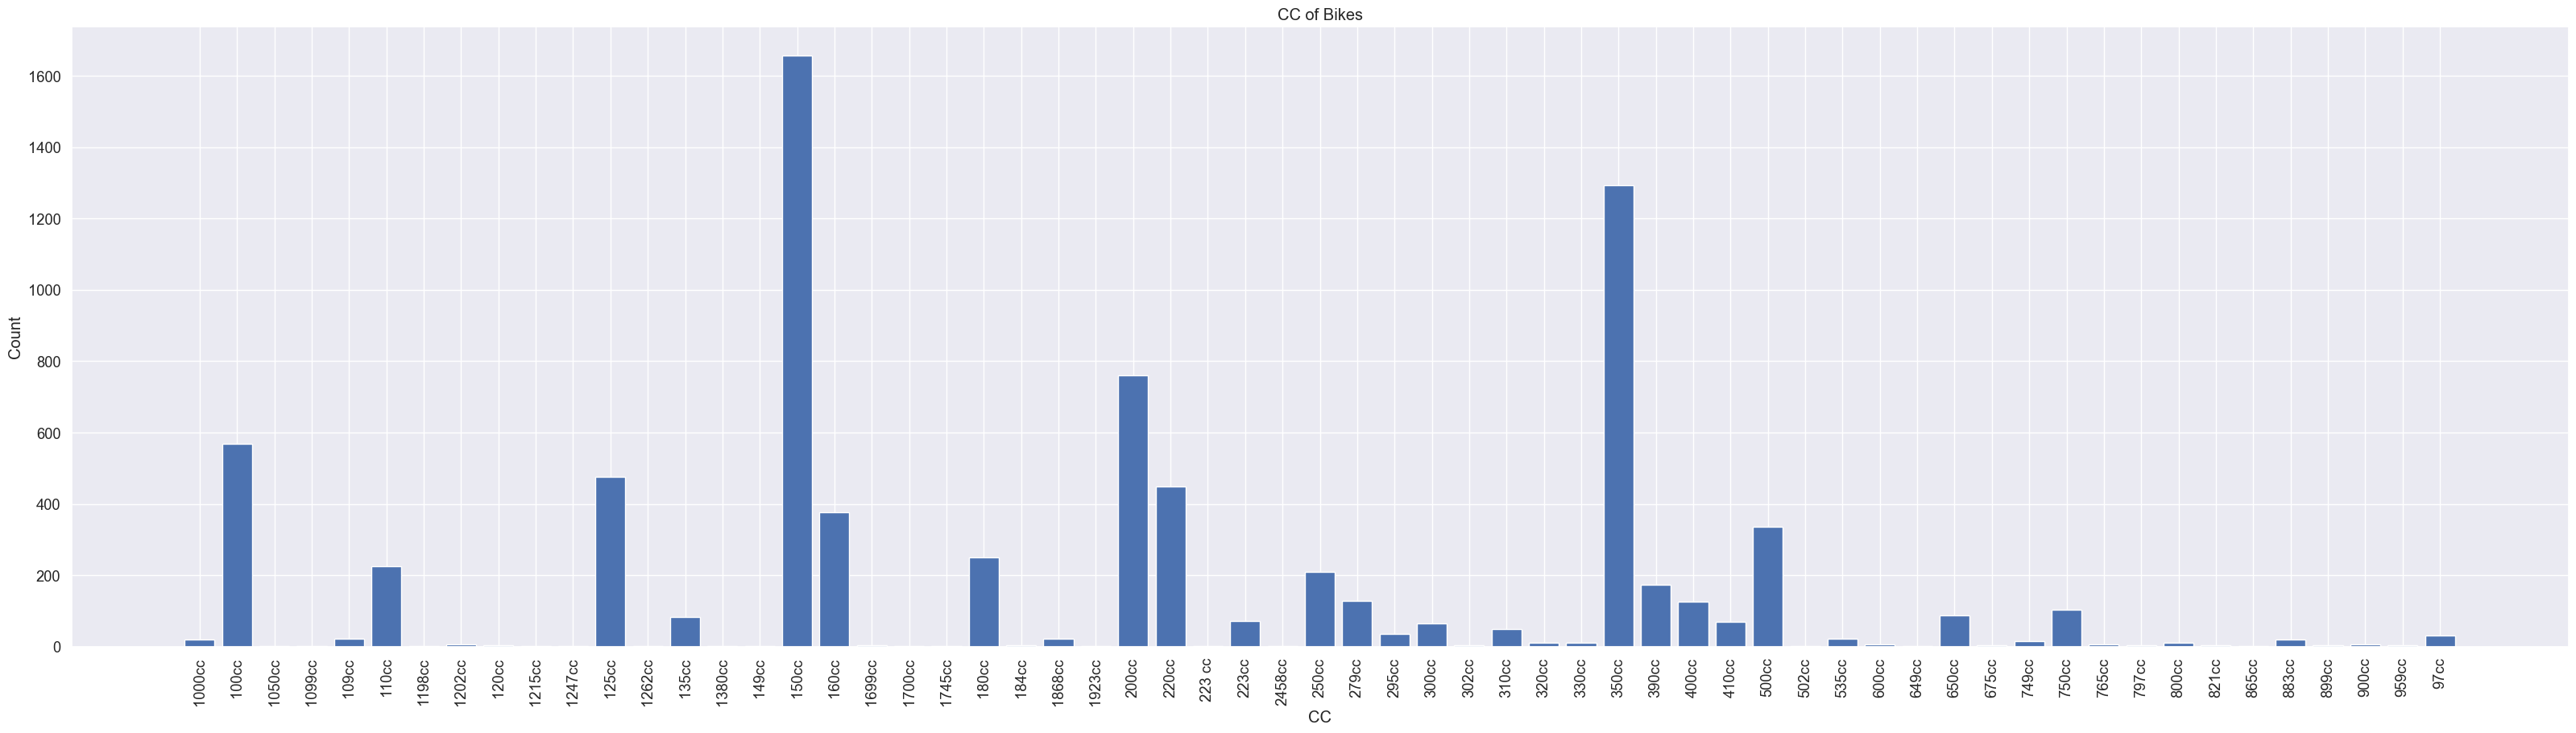

In [267]:
# ploting bar graph for CC of Bikes 
plt.figure(figsize=(40,10))
x,count = np.unique(data.cc,return_counts=True)
plt.bar([str(i) for i in x],count)
plt.title("CC of Bikes")
plt.xlabel("CC")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

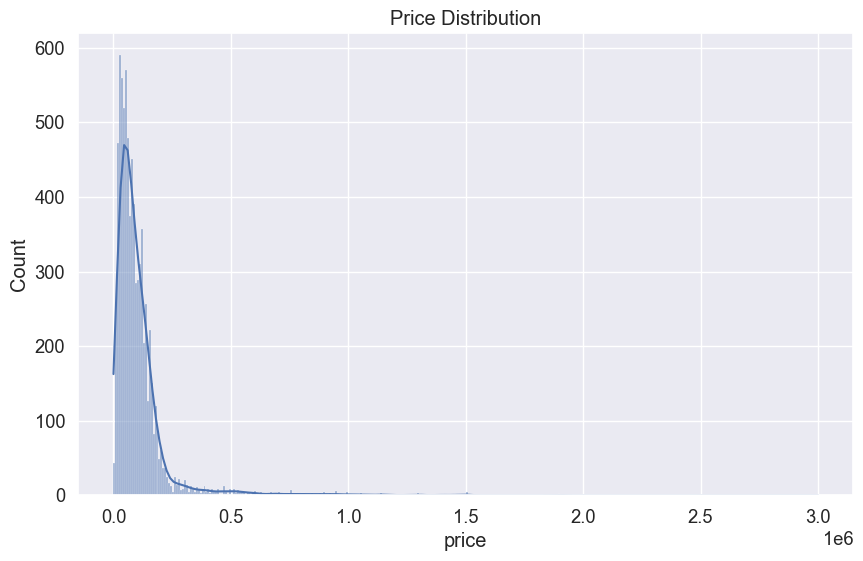

In [268]:
# ploting bar graph for Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(pd.read_csv("bikes.csv")['price'], kde=True)
plt.title('Price Distribution')
plt.show()

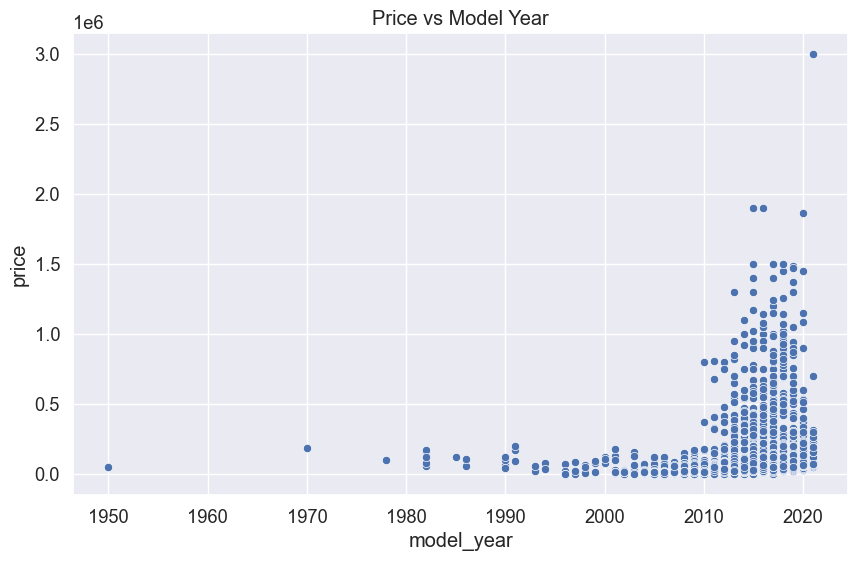

In [269]:
# ploting scatterplot for Price vs Model Year 
plt.figure(figsize=(10,6))
sns.scatterplot(data=pd.read_csv("bikes.csv"), x='model_year', y='price')
plt.title('Price vs Model Year')
plt.show()

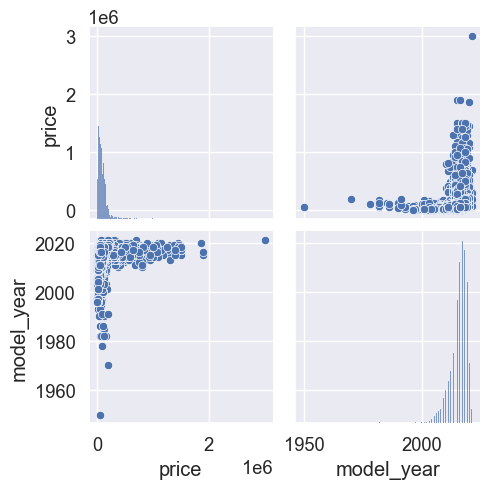

In [270]:
# ploting pairplot
sns.pairplot(pd.read_csv("bikes.csv")[['price', 'kms_driven', 'mileage', 'power', 'model_year']])
plt.show()

Summary

In [225]:
# preparing summary report
profile= ProfileReport(data, title='Used Bike Prices-Feature Engineering and EDA')

In [226]:
# summary report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/10 [00:00<?, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 24.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]